In [21]:
#### UT Course 5 Task 3 - Classification ###
############################################

#imports: numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#import estimators:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection

#import: model matrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#import: cross validation
from sklearn.model_selection import train_test_split

In [6]:
credit = pd.read_csv('Resources/default of credit card clients.csv', header =1)

In [7]:
# create a working copy of the data
rawData = credit.copy()

In [8]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
# dependent variable
y = rawData['default payment next month']
X = rawData
X = rawData.drop(['default payment next month'], axis = 1)

In [13]:
#get rid of negative values for PAY
X.PAY_0 = X.PAY_0 +2
X.PAY_2 = X.PAY_2 +2
X.PAY_3 = X.PAY_3 +2
X.PAY_4 = X.PAY_4 +2
X.PAY_5 = X.PAY_5 +2
X.PAY_6 = X.PAY_6 +2
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [14]:
# Split the data into train/test - 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [27]:
# Setup all models 
outcome = []
model_names = []
models = [('LR', LogisticRegression(penalty='l1', random_state=333, solver='liblinear')),
          ('KNN', KNeighborsClassifier(n_neighbors=20, algorithm='auto')),
          ('RF', RandomForestClassifier(n_estimators = 15, max_depth = 4, random_state = 333))]

### Logistic Regression ###

In [15]:
# adjusted max_iter with no effect, penalty did have an effect with optimal being l1 instead of default l2
logreg = LogisticRegression(penalty='l1', random_state=333)
logreg.fit(X_train, y_train)
log_ypred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/Users/cri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.81


### KNN Regression ###

In [16]:
# adjusted n_neighbors & algorithm -- n_neighbors of 20 raised it from .78 to .79, algorithm had no effect
knn = KNeighborsClassifier(n_neighbors=20, algorithm='auto')
knn.fit(X_train, y_train)
log_yknn = knn.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


### Random Forrest ###

In [40]:
# adjusted n_estimators - optimal was 15, max_depth optimal was 4
rf = RandomForestClassifier(n_estimators = 15, max_depth = 4, random_state = 333)
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)
print('Accuracy of random foreest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random foreest classifier on test set: 0.81


In [28]:

# this for loop will use k-fold validation to evaluate each algorithm with a 10-fold cross validation
random_seed = 333
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LR| Mean=0.809633 STD=0.012082
KNN| Mean=0.776733 STD=0.015555
RF| Mean=0.807533 STD=0.013811


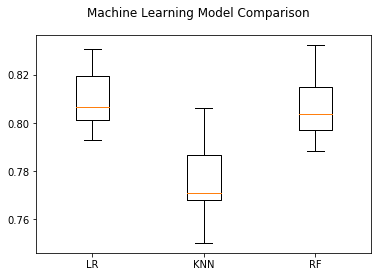

In [29]:
# Plot the results of the models against each other
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

In [31]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

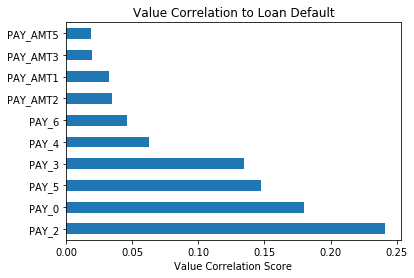

In [33]:
#Plot feature importance of the best model - Random Forsest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Value Correlation Score")
plt.title("Value Correlation to Loan Default")
plt.show()

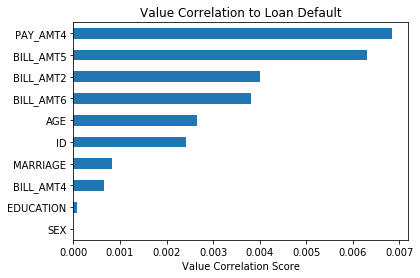

In [34]:
#Plot feature importance of the best model - Random Forsest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.xlabel("Value Correlation Score")
plt.title("Value Correlation to Loan Default")
plt.show()

### Making predictions ###

In [35]:
# Best Model
best_model = RandomForestClassifier(max_depth = 125, min_samples_split = 200, n_estimators = 100)
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=125, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# predictions 
predictions = best_model.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.68      0.37      0.48      1981

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000

